In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-alpha0


In [2]:
# Load training and eval data
((train_data, train_labels),
 (eval_data, eval_labels)) = tf.keras.datasets.mnist.load_data()

In [3]:
train_data = train_data/np.float32(255)
train_labels = train_labels.astype(np.int32)  

eval_data = eval_data/np.float32(255)
eval_labels = eval_labels.astype(np.int32)  

Text(0.5, 1.0, '4')

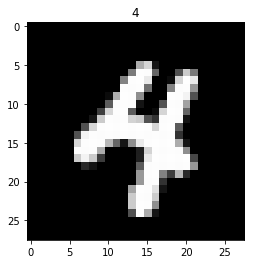

In [4]:
idx = np.random.randint(0,len(train_data))
plt.imshow(train_data[idx], cmap='gray')
plt.title(str(train_labels[idx]))

In [5]:
feature_columns = [tf.feature_column.numeric_column("x", shape=[28, 28])]

In [6]:
classifier = tf.estimator.LinearClassifier(
    feature_columns=feature_columns,
    n_classes=10,
    model_dir="mnist_model/"
)

In [7]:
train_input_fn =  tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={"x": train_data},
    y=train_labels,
    batch_size=100,
    num_epochs=None,
    shuffle=True)

In [33]:
classifier.train(input_fn=train_input_fn, steps=10)

In [9]:
val_input_fn =  tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={"x": eval_data},
    y=eval_labels,
    num_epochs=1,
    shuffle=False)

In [34]:
eval_results = classifier.evaluate(input_fn=val_input_fn)
print(eval_results)


{'accuracy': 0.8943, 'average_loss': 0.3749741, 'loss': 0.37293047, 'global_step': 130}
